(410, 410, 120)
nan


c:\users\rhydian\appdata\local\programs\python\python35\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


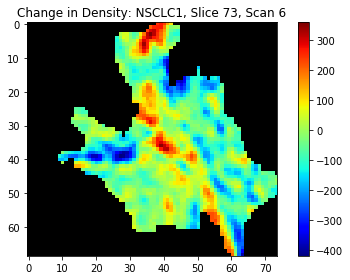

In [79]:
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np


    
path = "D:/fullTumourNiftys/NSCLC1_"
init_scan = nib.load(os.path.join(path,"NSCLC1__registered_OARsfullscan2.nii"))
init_scan_data = init_scan.get_data()
ymin = np.where(init_scan_data != 0)[0].min()
ymax = np.where(init_scan_data != 0)[0].max()+1
xmin = np.where(init_scan_data != 0)[1].min()
xmax = np.where(init_scan_data != 0)[1].max()+1
second_scan = nib.load(os.path.join(path,"NSCLC1__registered_OARsfullscan6.nii"))
second_scan_data = second_scan.get_data().astype(float)
fig,ax = plt.subplots(1)
ax.set_facecolor('black')
second_scan_data[second_scan_data == 0] = np.nan
diff = init_scan_data - second_scan_data
print(diff.shape)
print(diff.max())
plot = ax.imshow(diff[ymin:ymax,xmin:xmax,73],cmap = "jet")
fig.colorbar(plot)
plt.title("Change in Density: NSCLC1, Slice 73, Scan 6")
plt.tight_layout()
plt.savefig("D:/Interesting Pictures/NSCLC1-slice73-scan2-minus-scan6.png",transparent = False)

In [ ]:
array = np.array(img_scan[70])
def split_into_boxes(arr, box_size):
    if arr.ndim == 2:
        no_of_boxes = arr.shape[0]*arr.shape[1]/np.sqrt(box_size)
        """if(np.sqrt(no_of_boxes) != int(np.sqrt(no_of_boxes))):
            print("The box size needs to be a square number for 2-D")
            return None"""
        split_arrs = []
        x_split_arrs = np.array_split(array, np.sqrt(no_of_boxes), 0)
        for x_split_arr in x_split_arrs:
            xy_split_arrs = np.array_split(x_split_arr, np.sqrt(no_of_boxes), 1)
            split_arrs = split_arrs + xy_split_arrs
        return split_arrs, len(split_arrs)
    if arr.ndim == 3:
        if(np.cbrt(no_of_boxes) != int(np.cbrt(no_of_boxes))):
            print("The box size needs to be a cube number for 3-D")
            return None
        split_arrs = []
        x_split_arrs = np.array_split(array, np.cbrt(no_of_boxes), 0)
        for x_split_arr in x_split_arrs:
            xy_split_arrs = np.array_split(x_split_arr, np.cbrt(no_of_boxes), 1)
            for xy_split_arr in xy_split_arrs:
                xyz_split_arrs = np.array_split(xy_split_arr, np.cbrt(no_of_boxes), 2)
            split_arrs = split_arrs + xyz_split_arrs
        return split_arrs,len(split_arrs)
    

arrays, no_of_arrays = split_into_boxes(array, 16)

for arr in arrays: print(arr.mean())

In [ ]:
def box_counting(img, box_sizes = [1,4,9,16,25,36,49,64,81,100,121,144,169,196]):
    count_array = []
    for box_size in box_sizes:
        arrays,no_of_arrays = split_into_boxes(img,box_size)
        counts = 0
        for arr in arrays: 
            if(arr.max()>1): 
                counts += 1
        count_array.append([box_size,counts,no_of_arrays])
    return count_array

values = box_counting(array)
for point in values: plt.scatter(log(point[0]),log(point[1]))
plt.show()

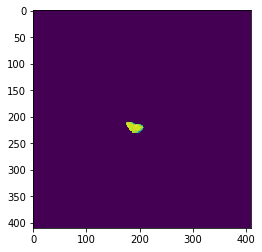

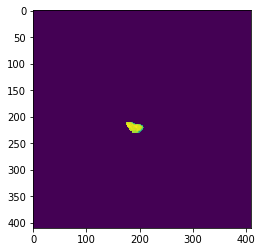

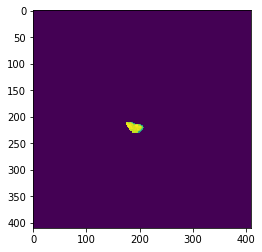

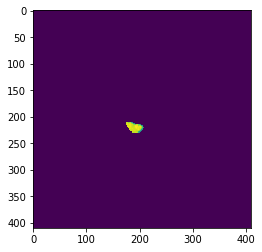

In [54]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from PIL import Image
path_to_niftis = "D:/fullTumourNiftys"
for patient_name in os.listdir(path_to_niftis):
    for scan_name in os.listdir(os.path.join(path_to_niftis,patient_name)):
        scan = nib.load(os.path.join(path_to_niftis,patient_name,scan_name))
        scan_data = scan.get_data()
        plt.imshow(scan_data[:,:,74])
        plt.show()
        plt.savefig("D:/myfile.png")
        #im.save("D:/fullTumourNiftys/myfile.png")
    break